In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('refined_dM2.csv')
df.head()

,session_id,gray_matter,left_acc,right_acc,left_insula,right_insula,left_caudate,right_caudate,left_putamen,right_putamen,Hb,T1a
0,sub-HC010_ses-MR_FOLLOWUP,"[0.015468, 0.011229, 0.010575, 0.007563, nan, ...","[0.010409, 0.009573, 0.012502, 0.008696, 0.004...","[0.020654, 0.015629, 0.016335, 0.012376, 0.006...","[0.017905, 0.016068, 0.008584, 0.013125, 0.007...","[0.017218, 0.013523, 0.012861, 0.008912, 0.008...","[0.00824, 0.006975, 0.006414, 0.008052, 0.0064...","[0.015163, 0.012297, 0.009674, 0.007837, nan, ...","[0.012845, 0.011406, 0.007149, 0.008084, 0.006...","[0.010933, 0.008899, 0.005981, 0.005354, nan, ...",16.9,5.633333
1,sub-HC010_ses-MR_BASELINE,"[0.010283, 0.010845, 0.008505, 0.007467, nan, ...","[0.009186, 0.007178, 0.005835, 0.005082, 0.004...","[0.010873, 0.008415, 0.005807, 0.006227, nan, ...","[0.01461, 0.009205, 0.010548, 0.006135, 0.0030...","[0.009735, 0.007871, 0.008109, 0.007217, 0.005...","[0.004813, 0.004249, 0.002536, 0.00381, 0.0036...","[0.009588, 0.008429, 0.008493, nan, nan, nan, ...","[0.009618, 0.007115, 0.007522, 0.00637, 0.0050...","[0.006073, 0.005443, 0.00439, nan, nan, nan, nan]",16.9,5.633333
2,sub-HC017_ses-MR_BASELINE,"[0.0273, 0.022279, 0.018281, 0.016482, 0.01230...","[0.018888, 0.018058, 0.013668, 0.012188, 0.010...","[0.041003, 0.027638, 0.021547, 0.017655, 0.018...","[0.035631, 0.0217, 0.021234, 0.014584, 0.01665...","[0.020573, 0.014642, 0.011624, 0.010119, 0.008...","[0.010077, 0.009671, 0.006364, 0.00741, 0.0045...","[0.014684, 0.011715, 0.009306, 0.008801, 0.006...","[0.023975, 0.016818, 0.014622, 0.011355, 0.011...","[0.015653, 0.008639, 0.008741, 0.005968, 0.005...",14.5,4.833333
3,sub-HC017_ses-MR_FOLLOWUP,"[0.02225, 0.017671, 0.01564, 0.013513, 0.01302...","[0.013484, 0.014594, 0.00855, 0.008028, 0.0091...","[0.024858, 0.015602, 0.01389, 0.014549, 0.0135...","[0.027992, 0.020475, 0.017916, 0.015815, 0.013...","[0.016196, 0.013668, 0.009976, 0.010179, 0.006...","[0.010461, 0.008747, 0.004586, 0.00446, 0.0044...","[0.014733, 0.009868, 0.008488, 0.006118, 0.007...","[0.017704, 0.015066, 0.011941, 0.010377, 0.008...","[0.013663, 0.007375, 0.007584, 0.006265, 0.004...",14.5,4.833333
4,sub-HC028_ses-MR_BASELINE,"[0.010334, 0.012185, 0.010931, 0.009333, nan, ...","[0.009799, 0.008688, 0.011168, 0.009733, 0.006...","[0.009503, 0.013822, 0.011599, 0.009188, nan, ...","[0.017826, 0.010339, 0.010303, 0.008395, 0.007...","[0.011007, 0.006186, 0.008663, 0.007371, 0.005...","[0.006702, 0.00503, 0.005877, 0.005118, 0.0042...","[0.005648, 0.009298, 0.008564, 0.006218, nan, ...","[0.013737, 0.007457, 0.009954, 0.007661, 0.007...","[0.005188, 0.010818, 0.008003, 0.005842, nan, ...",15.5,5.166667


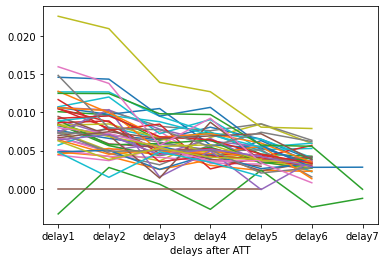

In [3]:
delays = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
fig, ax = plt.subplots()

for index, row in df.iterrows():
    data = row.left_caudate[1:-1].split(',') # convert string to list
    data = [float(i) for i in data if i != ' None']   
    ax.plot(delays, data, label=row.session_id)
    
plt.xlabel('delays after ATT')
plt.show()

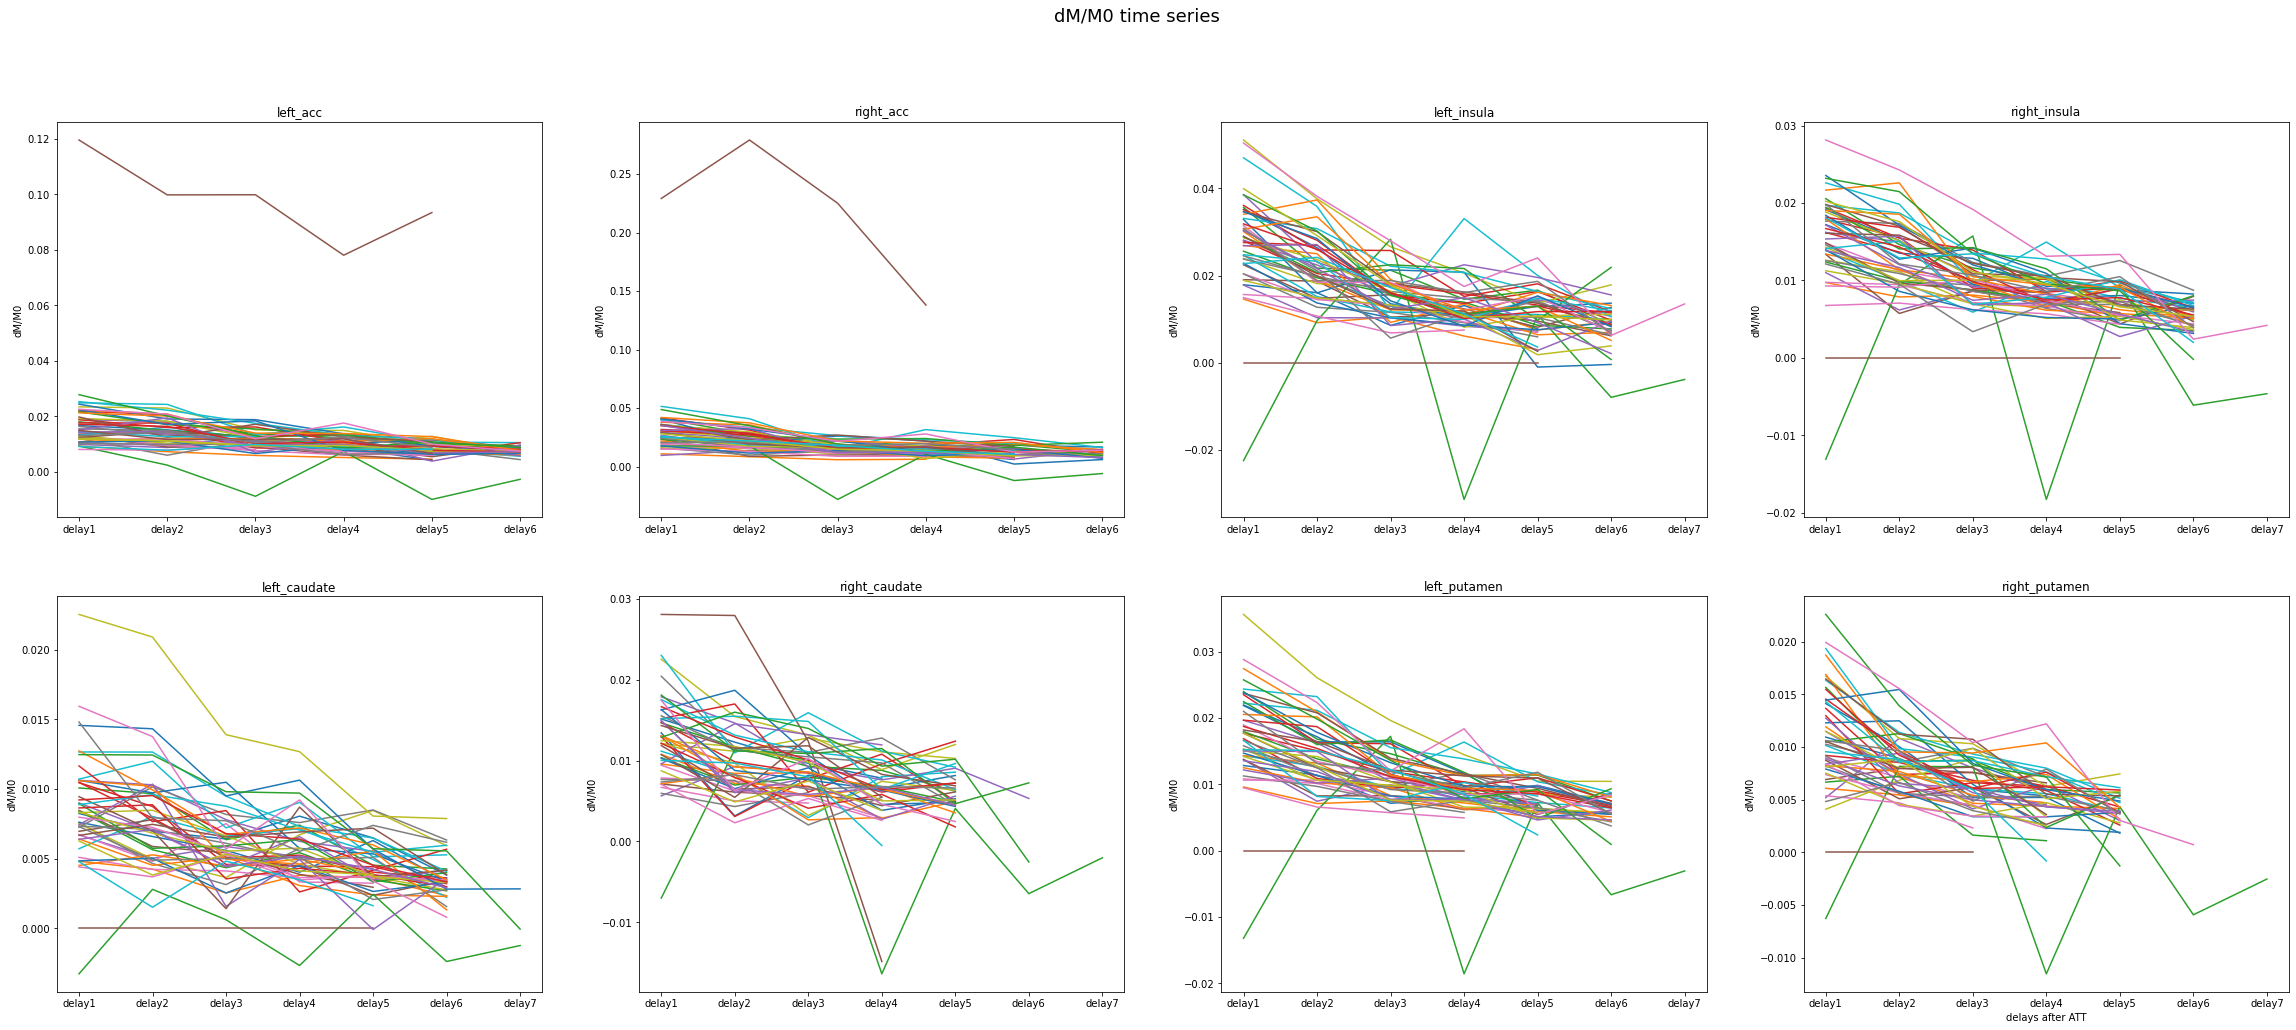

In [4]:
timepoints = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
fig, axes = plt.subplots(2,4, figsize=(40,16))

rois = ['left_acc', 'right_acc', 'left_insula', 'right_insula', 'left_caudate', 'right_caudate', 'left_putamen', 'right_putamen']

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
            
        for index, row in df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(delays, data)
            ax.set_ylabel('dM/M0')
#             ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('delays after ATT')
fig.suptitle('dM/M0 time series', fontsize=18)
fname="../figs/dMM0_timeseries.png"
plt.savefig(fname, facecolor='white', edgecolor='none')
plt.show()